   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


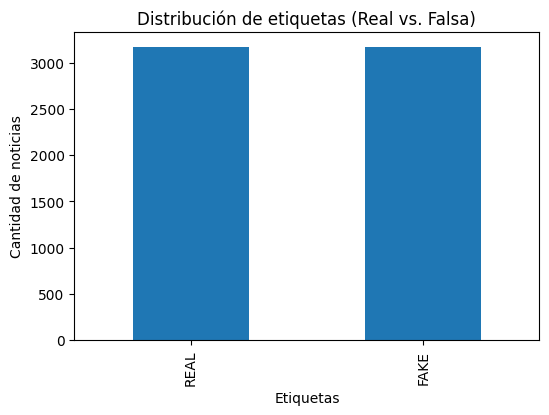

Epoch 1/10
159/159 [==============================] - 2s 3ms/step - loss: 0.5561 - accuracy: 0.7289
Epoch 2/10
159/159 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8197
Epoch 3/10
159/159 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8398
Epoch 4/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8494
Epoch 5/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8548
Epoch 6/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8617
Epoch 7/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8633
Epoch 8/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8640
Epoch 9/10
159/159 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8704
Epoch 10/10
40/40 [==============================] - 0s 2ms/step


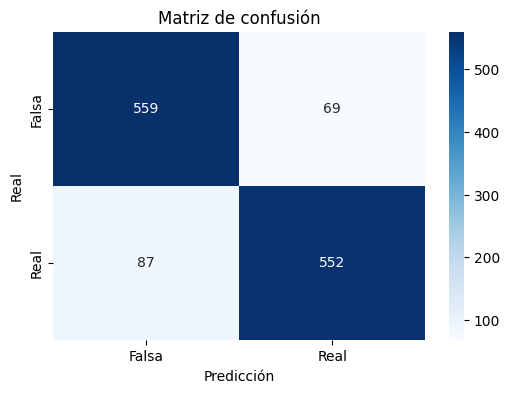

1/1 [==============================] - 0s 16ms/step
La noticia 1 es falsa
La noticia 2 es falsa


In [48]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos desde el enlace original
df = pd.read_csv('C:/Users/LENOVO/Documents/IA bootcamp ucamp/PROYECTOS FINALES/Fake or Real News/fake_or_real_news.csv')

# Análisis exploratorio de datos (EDA)
print(df.head())

# Gráfico de la distribución de etiquetas
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribución de etiquetas (Real vs. Falsa)')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad de noticias')
plt.show()

# Preprocesar el texto
df['text'] = df['text'].apply(preprocess_text)

# Entrenar un modelo Word2Vec
model_w2v = Word2Vec(df['text'], vector_size=100, window=5, min_count=1, sg=0)

# Definir una función para vectorizar el texto
def vectorize_text(text, model):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Aplicar la función de vectorización a cada noticia
df['vector'] = df['text'].apply(lambda x: vectorize_text(x, model_w2v))

# Dividir los datos en entrenamiento y prueba
X = np.array(df['vector'].to_list())
y = df['label'].map({'FAKE': 0, 'REAL': 1}).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una red neuronal para la clasificación
model = Sequential()
model.add(Dense(10, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10)

# Visualizar la matriz de confusión en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Probamos el modelo con las noticias de prueba
noticia1 = "Saudi Arabian soccer team Al-Hilal makes record $332 million bid for France striker Kylian Mbappé"
noticia2 = "Exposed: FBI Director James Comey’s Clinton Foundation Connection"

# Vectorizamos las noticias de prueba
noticia1_vec = vectorize_text(preprocess_text(noticia1), model_w2v)
noticia2_vec = vectorize_text(preprocess_text(noticia2), model_w2v)

# Predecimos las noticias
prediction1 = model.predict(np.array([noticia1_vec]))
prediction2 = model.predict(np.array([noticia2_vec]))

# Mostramos los resultados
if prediction1 > 0.5:
    print("La noticia 1 es verdadera")
else:
    print("La noticia 1 es falsa")

if prediction2 > 0.5:
    print("La noticia 2 es verdadera")
else:
    print("La noticia 2 es falsa")
